# ChEMBL Dataset
This notebook uses the official ChEMBL Python client API, linked <a href="https://github.com/chembl/chembl_webresource_client/tree/master">here</a>.  
This notebook generates a .TXT file for CB1 ligands for the fine-tuning of a SMILES transformer to be used to generate embeddings for CB2 ligands

## Dependencies

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
DATA_PATH = "./data/cb1_binders.csv"

### Only run following cells to originally call ChEMBL API and recieve data

In [1]:
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils

# columns to be selected from API
col_select = ['molecule_chembl_id', 'canonical_smiles', 'relation', 'type', 'value']

# load in dataset of all compounds with reported activity w/ any target in ChEMBL database
cb1_target = new_client.activity
# load in all CB1-specific (CHEMBL218) small mollecules w/ reported Ki value <= 450, and investigated in humans
cb1_binders = cb1_target.filter(target_chembl_id__iexact='CHEMBL218', standard_type__iexact='ki',
                                    standard_value__lte=5000, target_organism='Homo sapiens').only(col_select)

print(f"\n# of CB1 binders: {len(cb1_binders)}")
print(f"\nExample Molecule: \n{cb1_binders[0]}")


# of CB1 binders: 0

Example Molecule: 
None


In [ ]:
# cast JSON to Pandas DataFrame for easier use
cb1_binders_ki = pd.DataFrame(cb1_binders)

cb1_binders_ki

In [ ]:
# save as CSV file
cb1_binders_ki.to_csv("./data/cb1_binders.csv")

### If data downloaded to local repository, read data from CSV file here

In [3]:
# read in all CB2 ligands w/ Ki information and other molecular properties
cb1_molecules = pd.read_csv(DATA_PATH)

In [4]:
# remove all duplicates based off ChEMBL ID
# 12K molecules --> 2,724 unique CB2 ligands
cb1_molecules = cb1_molecules.drop_duplicates("molecule_chembl_id")

cb1_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value
0,0,N=C(NS(=O)(=O)c1ccc(F)cc1)N1CC(c2ccccc2)C(c2cc...,CHEMBL158502,=,Ki,52.6
1,1,C/N=C(\NS(=O)(=O)c1ccc(C(F)(F)F)cc1)N1CC(c2ccc...,CHEMBL345466,=,Ki,221.0
2,2,C/N=C(\NS(=O)(=O)c1ccc(Cl)cc1)N1CC(c2ccccc2)C(...,CHEMBL159201,=,Ki,214.0
3,3,C/N=C(\NC(=O)c1ccc(Cl)cc1)N1CC(c2ccccc2)C(c2cc...,CHEMBL158700,=,Ki,70.6
4,4,C/N=C(\NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CC(c2ccc...,CHEMBL157591,=,Ki,36.5
...,...,...,...,...,...,...
4058,4058,O=C(Nc1cccnc1)c1cc2cccnc2n(CCCCF)c1=O,CHEMBL5208223,>,Ki,1000.0
4059,4059,O=C(NC12CC3CC(CC(C3)C1)C2)c1cc2cccnc2n(CCCCF)c1=O,CHEMBL5198892,=,Ki,0.6
4060,4060,O=C(NC12CC3CC(CC(C3)C1)C2)c1cc2cccnc2n(Cc2ccc(...,CHEMBL5186632,=,Ki,1.5
4061,4061,O=C(NC12CC3CC(CC(C3)C1)C2)c1cc2cccnc2n(CCOCCF)...,CHEMBL5183565,=,Ki,3.9


In [5]:
# describe columns
cb1_molecules.describe()

,Unnamed: 0,value
count,3152.000000,3152.000000
mean,2060.935596,666.576404
std,1181.659475,1187.333916
min,0.000000,-9.490000
25%,1033.750000,6.000000
50%,2123.500000,60.850000
75%,3077.250000,763.000000
max,4064.000000,5000.000000


In [6]:
# check for null values
cb1_molecules.isnull().sum()

Unnamed: 0            0
canonical_smiles      0
molecule_chembl_id    0
relation              1
type                  0
value                 0
dtype: int64

In [7]:
# remove null value in "relation" column
cb1_molecules.dropna(inplace=True)

cb1_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value
0,0,N=C(NS(=O)(=O)c1ccc(F)cc1)N1CC(c2ccccc2)C(c2cc...,CHEMBL158502,=,Ki,52.6
1,1,C/N=C(\NS(=O)(=O)c1ccc(C(F)(F)F)cc1)N1CC(c2ccc...,CHEMBL345466,=,Ki,221.0
2,2,C/N=C(\NS(=O)(=O)c1ccc(Cl)cc1)N1CC(c2ccccc2)C(...,CHEMBL159201,=,Ki,214.0
3,3,C/N=C(\NC(=O)c1ccc(Cl)cc1)N1CC(c2ccccc2)C(c2cc...,CHEMBL158700,=,Ki,70.6
4,4,C/N=C(\NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CC(c2ccc...,CHEMBL157591,=,Ki,36.5
...,...,...,...,...,...,...
4058,4058,O=C(Nc1cccnc1)c1cc2cccnc2n(CCCCF)c1=O,CHEMBL5208223,>,Ki,1000.0
4059,4059,O=C(NC12CC3CC(CC(C3)C1)C2)c1cc2cccnc2n(CCCCF)c1=O,CHEMBL5198892,=,Ki,0.6
4060,4060,O=C(NC12CC3CC(CC(C3)C1)C2)c1cc2cccnc2n(Cc2ccc(...,CHEMBL5186632,=,Ki,1.5
4061,4061,O=C(NC12CC3CC(CC(C3)C1)C2)c1cc2cccnc2n(CCOCCF)...,CHEMBL5183565,=,Ki,3.9


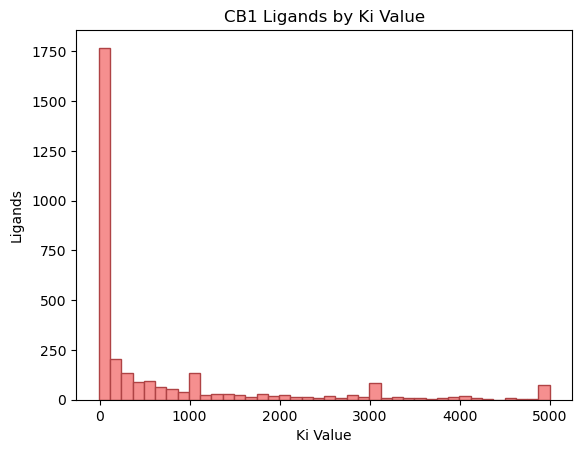

In [8]:
# graph distribution of data in various properties

plt.hist(cb1_molecules["value"], bins=40, color="#f58f8fff", edgecolor="#af4345")
plt.title('CB1 Ligands by Ki Value')
plt.xlabel('Ki Value')
plt.ylabel('Ligands', labelpad=5)

plt.show()

In [9]:
# choose SMILES representations of all CB2 ligands for deep learning
X = cb1_molecules["canonical_smiles"].values

print(f"# of CB1 Ligands: {len(X)}")
print(f"Example SMILES: {X[0]}")

# of CB1 Ligands: 3151
Example SMILES: N=C(NS(=O)(=O)c1ccc(F)cc1)N1CC(c2ccccc2)C(c2ccc(Cl)cc2)=N1


In [10]:
# save SMILES representations as TXT file
np.savetxt("./data/CB1_SMILES.txt", X, fmt="%s")
print("Saved")

Saved


### <br/> Convert .TXT to .TSV needed for fine-tuning of SMILES Transformer

In [11]:
from rdkit import Chem
from rdkit.Chem import inchi

i = 0

with open('./data/CB1.txt', 'r') as cb1_smiles:
    
    with open('./data/CB1.tsv', 'w') as cb1_smiles_iupac:
        
        for line in cb1_smiles:
            if i == 0:
                print('\t', file=cb1_smiles_iupac)
                i += 1

            else:
                SMILES = line.rstrip()
                mol = Chem.MolFromSmiles(SMILES)
                inchi_string = inchi.MolToInchi(mol)
                iupac_name = inchi.InchiToInchiKey(inchi_string)
                
                print(line.rstrip() + '\t' + iupac_name, file=cb1_smiles_iupac)

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefined stereo

[12:01:22] WARNING: Omitted undefi